# <font color='red'> Notebook 2 - Classification Model comparison 

### Project description:
- Please read the Data Set Information section to learn about this dataset. 
- Data description is also provided for this dataset.
- Read data into Jupyter notebook, use pandas to import data into a data frame
- Preprocess data: Explore data, check for missing data and apply data scaling. Justify the type of scaling used.
- We use train, test and validation datasets to get a more accurate results.


### Classification task and objective:

- To Find best parameters for following classification models: KNN classifcation, Logistic Regression, Linear Supprt Vector Machine, Kerenilzed Support Vector Machine, Decision Tree. 
- Grid Search is used to find the best scaling parameter
- Which model gives the best results?



---
### Data Set Information:
This dataset is taken from a research explained here. 

The goal of the research is to help the auditors by building a classification model that can predict the fraudulent firm on the basis the present and historical risk factors. The information about the sectors and the counts of firms are listed respectively as Irrigation (114), Public Health (77), Buildings and Roads (82), Forest (70), Corporate (47), Animal Husbandry (95), Communication (1), Electrical (4), Land (5), Science and Technology (3), Tourism (1), Fisheries (41), Industries (37), Agriculture (200).

There are two csv files to present data. Please merge these two datasets into one dataframe. All the steps should be done in Python. Please don't make any changes in csv files. Consider ``Audit_Risk`` as target columns for regression tasks, and ``Risk`` as the target column for classification tasks. 

### Attribute Information:
Many risk factors are examined from various areas like past records of audit office, audit-paras, environmental conditions reports, firm reputation summary, on-going issues report, profit-value records, loss-value records, follow-up reports etc. After in-depth interview with the auditors, important risk factors are evaluated and their probability of existence is calculated from the present and past records.


### Relevant Papers:
Hooda, Nishtha, Seema Bawa, and Prashant Singh Rana. 'Fraudulent Firm Classification: A Case Study of an External Audit.' Applied Artificial Intelligence 32.1 (2018): 48-64.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
audit_risk_df = pd.read_csv("audit_risk.csv")
trial_df = pd.read_csv("trial.csv")
audit_risk_df.T
audit_risk_df['Risk'].describe()

count    776.000000
mean       0.393041
std        0.488741
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Risk, dtype: float64

In [3]:
print(audit_risk_df.columns)
print(trial_df.columns)

Index(['Sector_score', 'LOCATION_ID', 'PARA_A', 'Score_A', 'Risk_A', 'PARA_B',
       'Score_B', 'Risk_B', 'TOTAL', 'numbers', 'Score_B.1', 'Risk_C',
       'Money_Value', 'Score_MV', 'Risk_D', 'District_Loss', 'PROB', 'RiSk_E',
       'History', 'Prob', 'Risk_F', 'Score', 'Inherent_Risk', 'CONTROL_RISK',
       'Detection_Risk', 'Audit_Risk', 'Risk'],
      dtype='object')
Index(['Sector_score', 'LOCATION_ID', 'PARA_A', 'SCORE_A', 'PARA_B', 'SCORE_B',
       'TOTAL', 'numbers', 'Marks', 'Money_Value', 'MONEY_Marks', 'District',
       'Loss', 'LOSS_SCORE', 'History', 'History_score', 'Score', 'Risk'],
      dtype='object')


In [4]:
audit_risk_df = audit_risk_df.drop("Detection_Risk", axis = 1)

In [5]:
trial_df.T
trial_df['Risk'].unique()

array([1, 0])

In [6]:
audit_risk_df.head(2)

,Sector_score,LOCATION_ID,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,...,PROB,RiSk_E,History,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Audit_Risk,Risk
0,3.89,23,4.18,0.6,2.508,2.50,0.2,0.500,6.68,5.0,...,0.2,0.4,0,0.2,0.0,2.4,8.574,0.4,1.7148,1
1,3.89,6,0.00,0.2,0.000,4.83,0.2,0.966,4.83,5.0,...,0.2,0.4,0,0.2,0.0,2.0,2.554,0.4,0.5108,0


In [7]:
audit_risk_df["Money_Value"].head(2)

0    3.38
1    0.94
Name: Money_Value, dtype: float64

In [8]:
audit_risk_df["Score_A"] = audit_risk_df["Score_A"]*10
audit_risk_df["Score_B"] = audit_risk_df["Score_B"]*10

c_with_risk_cols = ['Sector_score', 'LOCATION_ID', 'PARA_A', 'Score_A', 'PARA_B', 'Score_B', 'TOTAL', 'numbers', 'Money_Value', 'History','Score', 'Risk']
c_without_risk_cols = ['Sector_score', 'LOCATION_ID', 'PARA_A', 'Score_A', 'PARA_B', 'Score_B', 'TOTAL', 'numbers', 'Money_Value', 'History','Score']
c_with_risk_cols_upper = [x.upper() for x in c_with_risk_cols]
c_without_risk_cols_upper = [x.upper() for x in c_without_risk_cols]

audit_names = audit_risk_df.columns
audit_names_upper =  [x.upper() for x in audit_names]
audit_risk_df.columns = audit_names_upper

trial_names = trial_df.columns
trial_names_upper =  [x.upper() for x in trial_names]
trial_df.columns = trial_names_upper

# c_with_risk_cols will result in an inner merge (~580 observations on dropping duplicates)
# c_without_risk_cols will result in 763 observations after dropping duplicates but with two target variables which can be reduced using a Logical OR in case 

risk_df = audit_risk_df.merge(trial_df, on=c_without_risk_cols_upper)
risk_df.shape
risk_df = risk_df.drop_duplicates()
risk_df.shape

(763, 33)

In [9]:
risk_df.columns

Index(['SECTOR_SCORE', 'LOCATION_ID', 'PARA_A', 'SCORE_A', 'RISK_A', 'PARA_B',
       'SCORE_B', 'RISK_B', 'TOTAL', 'NUMBERS', 'SCORE_B.1', 'RISK_C',
       'MONEY_VALUE', 'SCORE_MV', 'RISK_D', 'DISTRICT_LOSS', 'PROB', 'RISK_E',
       'HISTORY', 'PROB', 'RISK_F', 'SCORE', 'INHERENT_RISK', 'CONTROL_RISK',
       'AUDIT_RISK', 'RISK_x', 'MARKS', 'MONEY_MARKS', 'DISTRICT', 'LOSS',
       'LOSS_SCORE', 'HISTORY_SCORE', 'RISK_y'],
      dtype='object')

In [10]:
 ##Central Imputation

risk_df['MONEY_VALUE'] = risk_df["MONEY_VALUE"].fillna(risk_df["MONEY_VALUE"].mean())
# merged_data_sans_dup = merged_data_sans_dup["Money_Value"].fillna(merged_data_sans_dup["Money_Value"].median())

risk_df.isnull().sum()

SECTOR_SCORE     0
LOCATION_ID      0
PARA_A           0
SCORE_A          0
RISK_A           0
PARA_B           0
SCORE_B          0
RISK_B           0
TOTAL            0
NUMBERS          0
SCORE_B.1        0
RISK_C           0
MONEY_VALUE      0
SCORE_MV         0
RISK_D           0
DISTRICT_LOSS    0
PROB             0
RISK_E           0
HISTORY          0
PROB             0
RISK_F           0
SCORE            0
INHERENT_RISK    0
CONTROL_RISK     0
AUDIT_RISK       0
RISK_x           0
MARKS            0
MONEY_MARKS      0
DISTRICT         0
LOSS             0
LOSS_SCORE       0
HISTORY_SCORE    0
RISK_y           0
dtype: int64

In [11]:
# Type conversions: Location ID that holds three string values and rest in the form of numeric values is a categorical attribute
risk_df = risk_df.copy()
risk_df[['LOCATION_ID']] = risk_df[['LOCATION_ID']].astype('category')

# Check type conversions
risk_df.dtypes

SECTOR_SCORE      float64
LOCATION_ID      category
PARA_A            float64
SCORE_A           float64
RISK_A            float64
PARA_B            float64
SCORE_B           float64
RISK_B            float64
TOTAL             float64
NUMBERS           float64
SCORE_B.1         float64
RISK_C            float64
MONEY_VALUE       float64
SCORE_MV          float64
RISK_D            float64
DISTRICT_LOSS       int64
PROB              float64
RISK_E            float64
HISTORY             int64
PROB              float64
RISK_F            float64
SCORE             float64
INHERENT_RISK     float64
CONTROL_RISK      float64
AUDIT_RISK        float64
RISK_x              int64
MARKS               int64
MONEY_MARKS         int64
DISTRICT            int64
LOSS                int64
LOSS_SCORE          int64
HISTORY_SCORE       int64
RISK_y              int64
dtype: object

In [12]:
risk_df["LOCATION_ID"]= risk_df["LOCATION_ID"].replace("LOHARU", 45)
risk_df["LOCATION_ID"]= risk_df["LOCATION_ID"].replace("NUH", 46)
risk_df["LOCATION_ID"]= risk_df["LOCATION_ID"].replace("SAFIDON", 47)

In [13]:
risk_df.describe()

,SECTOR_SCORE,PARA_A,SCORE_A,RISK_A,PARA_B,SCORE_B,RISK_B,TOTAL,NUMBERS,SCORE_B.1,...,CONTROL_RISK,AUDIT_RISK,RISK_x,MARKS,MONEY_MARKS,DISTRICT,LOSS,LOSS_SCORE,HISTORY_SCORE,RISK_y
count,763.000000,763.000000,763.000000,763.000000,763.000000,763.000000,763.000000,763.000000,763.000000,763.000000,...,763.000000,763.000000,763.000000,763.000000,763.000000,763.000000,763.000000,763.000000,763.000000,763.000000
mean,19.721311,2.491298,3.538663,1.373919,10.983474,3.150721,6.441822,13.442532,5.068807,0.224115,...,0.574574,7.284109,0.398427,2.241153,2.925295,2.508519,0.030144,2.062910,2.170380,0.635649
std,24.132399,5.718259,1.743985,3.465152,50.489113,1.705967,30.316831,51.719679,0.266546,0.080974,...,0.447253,38.985618,0.489895,0.809740,1.606557,1.230994,0.185804,0.378178,0.685288,0.481563
min,1.850000,0.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,5.000000,0.200000,...,0.400000,0.280000,0.000000,2.000000,2.000000,2.000000,0.000000,2.000000,2.000000,0.000000
25%,2.370000,0.260000,2.000000,0.052000,0.000000,2.000000,0.000000,0.590000,5.000000,0.200000,...,0.400000,0.318600,0.000000,2.000000,2.000000,2.000000,0.000000,2.000000,2.000000,0.000000
50%,3.890000,0.900000,2.000000,0.180000,0.440000,2.000000,0.088000,1.420000,5.000000,0.200000,...,0.400000,0.590000,0.000000,2.000000,2.000000,2.000000,0.000000,2.000000,2.000000,1.000000
75%,55.570000,2.515000,6.000000,1.509000,4.365000,4.000000,2.104000,7.990000,5.000000,0.200000,...,0.400000,3.452800,1.000000,2.000000,4.000000,2.000000,0.000000,2.000000,2.000000,1.000000
max,59.850000,85.000000,6.000000,51.000000,1264.630000,6.000000,758.778000,1268.910000,9.000000,0.600000,...,5.800000,961.514400,1.000000,6.000000,6.000000,6.000000,2.000000,6.000000,6.000000,1.000000


{'whiskers': [<matplotlib.lines.Line2D at 0x12149ad68>,
 'caps': [<matplotlib.lines.Line2D at 0x121411438>,
 'boxes': [<matplotlib.lines.Line2D at 0x12149abe0>],
 'medians': [<matplotlib.lines.Line2D at 0x121411ac8>],
 'fliers': [<matplotlib.lines.Line2D at 0x121411e10>],
 'means': []}

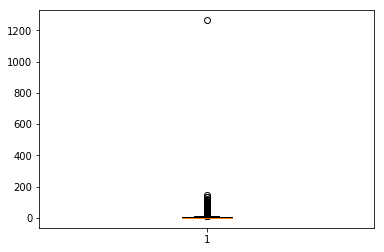

In [14]:
plt.boxplot(risk_df['PARA_B'])

In [15]:
risk_df[risk_df['PARA_B']==1264.630000]

,SECTOR_SCORE,LOCATION_ID,PARA_A,SCORE_A,RISK_A,PARA_B,SCORE_B,RISK_B,TOTAL,NUMBERS,...,CONTROL_RISK,AUDIT_RISK,RISK_x,MARKS,MONEY_MARKS,DISTRICT,LOSS,LOSS_SCORE,HISTORY_SCORE,RISK_y
241,2.72,2,4.28,6.0,2.568,1264.63,6.0,758.778,1268.91,5.5,...,2.4,961.5144,1,4,6,6,0,2,6,1


In [16]:
risk_df.shape

(763, 33)

In [17]:
sans_out =risk_df[risk_df.PARA_B != 1264.630000]

{'whiskers': [<matplotlib.lines.Line2D at 0x121573c50>,
 'caps': [<matplotlib.lines.Line2D at 0x12157f320>,
 'boxes': [<matplotlib.lines.Line2D at 0x121573b00>],
 'medians': [<matplotlib.lines.Line2D at 0x12157f9b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x12157fcf8>],
 'means': []}

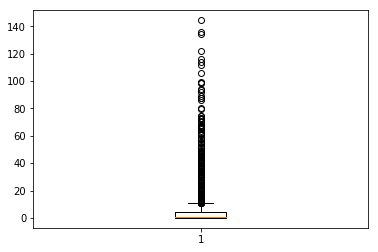

In [18]:
plt.boxplot(sans_out['PARA_B'])

In [19]:
sans_out[['MONEY_VALUE','RISK_D']].describe()

,MONEY_VALUE,RISK_D
count,762.000000,762.000000
mean,14.320450,8.370946
std,67.127781,40.310310
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.110000,0.021000
75%,5.965000,2.309000
max,935.030000,561.018000


In [20]:
sans_out[(sans_out['INHERENT_RISK'] == 622.838000) | (sans_out['TOTAL'] == 191.360000) | (sans_out['MONEY_VALUE'] == 935.030000) |(sans_out['RISK_D'] == 561.018000)]

,SECTOR_SCORE,LOCATION_ID,PARA_A,SCORE_A,RISK_A,PARA_B,SCORE_B,RISK_B,TOTAL,NUMBERS,...,CONTROL_RISK,AUDIT_RISK,RISK_x,MARKS,MONEY_MARKS,DISTRICT,LOSS,LOSS_SCORE,HISTORY_SCORE,RISK_y
39,3.89,19,7.97,6.0,4.782,17.18,6.0,10.308,25.15,5.0,...,0.4,115.5016,1,2,6,2,0,2,2,1
344,1.99,2,57.03,6.0,34.218,134.33,6.0,80.598,191.36,5.0,...,0.4,124.5676,1,2,6,2,0,2,2,1


In [21]:
final_df = sans_out[(sans_out['INHERENT_RISK'] != 622.838000) & (sans_out['TOTAL'] != 191.360000) & (sans_out['MONEY_VALUE'] != 935.030000) & (sans_out['RISK_D'] != 561.018000)]

In [22]:
final_df

,SECTOR_SCORE,LOCATION_ID,PARA_A,SCORE_A,RISK_A,PARA_B,SCORE_B,RISK_B,TOTAL,NUMBERS,...,CONTROL_RISK,AUDIT_RISK,RISK_x,MARKS,MONEY_MARKS,DISTRICT,LOSS,LOSS_SCORE,HISTORY_SCORE,RISK_y
0,3.89,23,4.18,6.0,2.508,2.5000,2.0,0.50000,6.6800,5.0,...,0.4,1.714800,1,2,2,2,0,2,2,1
1,3.89,6,0.00,2.0,0.000,4.8300,2.0,0.96600,4.8300,5.0,...,0.4,0.510800,0,2,2,2,0,2,2,0
2,3.89,6,0.51,2.0,0.102,0.2300,2.0,0.04600,0.7400,5.0,...,0.4,0.309600,0,2,2,2,0,2,2,0
3,3.89,6,0.00,2.0,0.000,10.8000,6.0,6.48000,10.8000,6.0,...,0.4,3.506000,1,6,6,2,0,2,2,1
4,3.89,6,0.00,2.0,0.000,0.0800,2.0,0.01600,0.0800,5.0,...,0.4,0.283200,0,2,2,2,0,2,2,0
5,3.89,6,0.00,2.0,0.000,0.8300,2.0,0.16600,0.8300,5.0,...,0.4,0.431200,0,2,2,2,0,2,2,0
6,3.89,7,1.10,4.0,0.440,7.4100,4.0,2.96400,8.5100,5.0,...,0.4,6.354800,1,2,6,2,0,2,2,1
7,3.89,8,8.50,6.0,5.100,12.0300,6.0,7.21800,20.5300,5.5,...,0.4,3.606800,1,4,4,2,0,2,2,1
8,3.89,8,8.40,6.0,5.040,11.0500,6.0,6.63000,19.4500,5.5,...,0.4,3.441200,1,4,4,2,0,2,2,1
9,3.89,8,3.98,6.0,2.388,0.9900,2.0,0.19800,4.9700,5.0,...,0.4,0.874400,0,2,2,2,0,2,2,1


{'whiskers': [<matplotlib.lines.Line2D at 0x123740588>,
 'caps': [<matplotlib.lines.Line2D at 0x123740c50>,
 'boxes': [<matplotlib.lines.Line2D at 0x123740438>],
 'medians': [<matplotlib.lines.Line2D at 0x123746320>],
 'fliers': [<matplotlib.lines.Line2D at 0x123746668>],
 'means': []}

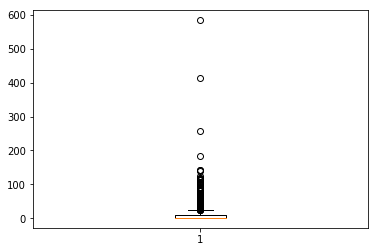

In [23]:
plt.boxplot(final_df['INHERENT_RISK'])

In [24]:
final_df.shape

(760, 33)

In [25]:
final_df['RISK'] = final_df['RISK_x'] & final_df['RISK_y']

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [26]:
final_df = final_df.drop(['RISK_x','RISK_y'],axis=1)

In [27]:
final_df

,SECTOR_SCORE,LOCATION_ID,PARA_A,SCORE_A,RISK_A,PARA_B,SCORE_B,RISK_B,TOTAL,NUMBERS,...,INHERENT_RISK,CONTROL_RISK,AUDIT_RISK,MARKS,MONEY_MARKS,DISTRICT,LOSS,LOSS_SCORE,HISTORY_SCORE,RISK
0,3.89,23,4.18,6.0,2.508,2.5000,2.0,0.50000,6.6800,5.0,...,8.57400,0.4,1.714800,2,2,2,0,2,2,1
1,3.89,6,0.00,2.0,0.000,4.8300,2.0,0.96600,4.8300,5.0,...,2.55400,0.4,0.510800,2,2,2,0,2,2,0
2,3.89,6,0.51,2.0,0.102,0.2300,2.0,0.04600,0.7400,5.0,...,1.54800,0.4,0.309600,2,2,2,0,2,2,0
3,3.89,6,0.00,2.0,0.000,10.8000,6.0,6.48000,10.8000,6.0,...,17.53000,0.4,3.506000,6,6,2,0,2,2,1
4,3.89,6,0.00,2.0,0.000,0.0800,2.0,0.01600,0.0800,5.0,...,1.41600,0.4,0.283200,2,2,2,0,2,2,0
5,3.89,6,0.00,2.0,0.000,0.8300,2.0,0.16600,0.8300,5.0,...,2.15600,0.4,0.431200,2,2,2,0,2,2,0
6,3.89,7,1.10,4.0,0.440,7.4100,4.0,2.96400,8.5100,5.0,...,31.77400,0.4,6.354800,2,6,2,0,2,2,1
7,3.89,8,8.50,6.0,5.100,12.0300,6.0,7.21800,20.5300,5.5,...,18.03400,0.4,3.606800,4,4,2,0,2,2,1
8,3.89,8,8.40,6.0,5.040,11.0500,6.0,6.63000,19.4500,5.5,...,17.20600,0.4,3.441200,4,4,2,0,2,2,1
9,3.89,8,3.98,6.0,2.388,0.9900,2.0,0.19800,4.9700,5.0,...,4.37200,0.4,0.874400,2,2,2,0,2,2,0


In [28]:
final_df.describe()

,SECTOR_SCORE,PARA_A,SCORE_A,RISK_A,PARA_B,SCORE_B,RISK_B,TOTAL,NUMBERS,SCORE_B.1,...,INHERENT_RISK,CONTROL_RISK,AUDIT_RISK,MARKS,MONEY_MARKS,DISTRICT,LOSS,LOSS_SCORE,HISTORY_SCORE,RISK
count,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,...,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000
mean,19.787842,2.409974,3.528947,1.324648,9.163488,3.139474,5.349245,11.541094,5.068421,0.223947,...,15.393907,0.572632,5.731831,2.239474,2.913158,2.505263,0.030263,2.063158,2.165789,0.396053
std,24.156673,5.372002,1.740536,3.257894,21.567462,1.699886,12.982757,23.734227,0.266590,0.080873,...,36.681740,0.443116,17.036510,0.808727,1.598034,1.226615,0.186161,0.378904,0.672351,0.489398
min,1.850000,0.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,5.000000,0.200000,...,1.400000,0.400000,0.280000,2.000000,2.000000,2.000000,0.000000,2.000000,2.000000,0.000000
25%,2.370000,0.257500,2.000000,0.051500,0.000000,2.000000,0.000000,0.587500,5.000000,0.200000,...,1.592000,0.400000,0.318400,2.000000,2.000000,2.000000,0.000000,2.000000,2.000000,0.000000
50%,3.890000,0.900000,2.000000,0.180000,0.435000,2.000000,0.087000,1.420000,5.000000,0.200000,...,2.228000,0.400000,0.586000,2.000000,2.000000,2.000000,0.000000,2.000000,2.000000,0.000000
75%,55.570000,2.482500,6.000000,1.489500,4.170000,4.000000,1.995000,7.767500,5.000000,0.200000,...,10.782000,0.400000,3.262500,2.000000,4.000000,2.000000,0.000000,2.000000,2.000000,1.000000
max,59.850000,85.000000,6.000000,51.000000,144.390000,6.000000,86.634000,148.230000,9.000000,0.600000,...,583.688000,5.800000,222.009600,6.000000,6.000000,6.000000,2.000000,6.000000,6.000000,1.000000


In [29]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 760 entries, 0 to 809
Data columns (total 32 columns):
SECTOR_SCORE     760 non-null float64
LOCATION_ID      760 non-null object
PARA_A           760 non-null float64
SCORE_A          760 non-null float64
RISK_A           760 non-null float64
PARA_B           760 non-null float64
SCORE_B          760 non-null float64
RISK_B           760 non-null float64
TOTAL            760 non-null float64
NUMBERS          760 non-null float64
SCORE_B.1        760 non-null float64
RISK_C           760 non-null float64
MONEY_VALUE      760 non-null float64
SCORE_MV         760 non-null float64
RISK_D           760 non-null float64
DISTRICT_LOSS    760 non-null int64
PROB             760 non-null float64
RISK_E           760 non-null float64
HISTORY          760 non-null int64
PROB             760 non-null float64
RISK_F           760 non-null float64
SCORE            760 non-null float64
INHERENT_RISK    760 non-null float64
CONTROL_RISK     760 non-n

In [30]:
import pandas as pd
import numpy as np

##rs = np.random.RandomState(0)
##final_df = pd.DataFrame(rs.rand(32, 32))
##corr = final_df.corr()
##corr.style.background_gradient(cmap='coolwarm').set_precision(2)

In [31]:
final_df.columns

Index(['SECTOR_SCORE', 'LOCATION_ID', 'PARA_A', 'SCORE_A', 'RISK_A', 'PARA_B',
       'SCORE_B', 'RISK_B', 'TOTAL', 'NUMBERS', 'SCORE_B.1', 'RISK_C',
       'MONEY_VALUE', 'SCORE_MV', 'RISK_D', 'DISTRICT_LOSS', 'PROB', 'RISK_E',
       'HISTORY', 'PROB', 'RISK_F', 'SCORE', 'INHERENT_RISK', 'CONTROL_RISK',
       'AUDIT_RISK', 'MARKS', 'MONEY_MARKS', 'DISTRICT', 'LOSS', 'LOSS_SCORE',
       'HISTORY_SCORE', 'RISK'],
      dtype='object')

In [32]:
final_df = final_df.drop(['MONEY_MARKS','DISTRICT'],axis=1)

In [33]:
final_df.columns

Index(['SECTOR_SCORE', 'LOCATION_ID', 'PARA_A', 'SCORE_A', 'RISK_A', 'PARA_B',
       'SCORE_B', 'RISK_B', 'TOTAL', 'NUMBERS', 'SCORE_B.1', 'RISK_C',
       'MONEY_VALUE', 'SCORE_MV', 'RISK_D', 'DISTRICT_LOSS', 'PROB', 'RISK_E',
       'HISTORY', 'PROB', 'RISK_F', 'SCORE', 'INHERENT_RISK', 'CONTROL_RISK',
       'AUDIT_RISK', 'MARKS', 'LOSS', 'LOSS_SCORE', 'HISTORY_SCORE', 'RISK'],
      dtype='object')

In [34]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

final_df1 = final_df.copy()
mm_scaler = MinMaxScaler()
std_scaler = StandardScaler()

y_final_reg = final_df['AUDIT_RISK']# Regression y

y_final_clf = final_df['RISK'] # Classification y
to_scale_x_df = final_df1.drop(["AUDIT_RISK","RISK"], axis =1)

mm_x_df = to_scale_x_df.copy()
std_x_df = to_scale_x_df.copy()

num_cols = ['SECTOR_SCORE', 'LOCATION_ID','PARA_A', 'SCORE_A', 'RISK_A', 'PARA_B',
       'SCORE_B', 'RISK_B', 'TOTAL', 'NUMBERS', 'SCORE_B.1', 'RISK_C',
       'MONEY_VALUE', 'SCORE_MV', 'RISK_D', 'DISTRICT_LOSS', 'PROB', 'RISK_E',
       'HISTORY','RISK_F', 'SCORE', 'INHERENT_RISK', 'CONTROL_RISK',
        'MARKS', 'LOSS', 'LOSS_SCORE', 'HISTORY_SCORE']
num_cols = [x.upper() for x in num_cols]

mm_x_df[num_cols] = mm_scaler.fit_transform(mm_x_df[num_cols])       # MinMax scaled X
std_x_df[num_cols] = std_scaler.fit_transform(std_x_df[num_cols])    # Std scaled X
X=mm_x_df[num_cols]
y=y_final_reg

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64, object were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64, object were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64, object were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [35]:
X.columns
X.shape


(760, 28)

# CLASSIFICATION MODELS


In [63]:
L= ['SECTOR_SCORE', 'LOCATION_ID', 'PARA_A', 'SCORE_A', 'PARA_B', 'SCORE_B', 'TOTAL', 'NUMBERS', 'MONEY_VALUE', 'HISTORY','SCORE', 'RISK']

In [64]:
audit_risk = audit_risk_df.merge(trial_df, on=L)

In [65]:
audit_risk['RISK'].unique()

array([1, 0])

In [66]:
audit_risk = audit_risk.drop(["MONEY_MARKS","DISTRICT"], axis=1)

In [67]:
audit_risk.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 629 entries, 0 to 628
Data columns (total 30 columns):
SECTOR_SCORE     629 non-null float64
LOCATION_ID      629 non-null object
PARA_A           629 non-null float64
SCORE_A          629 non-null float64
RISK_A           629 non-null float64
PARA_B           629 non-null float64
SCORE_B          629 non-null float64
RISK_B           629 non-null float64
TOTAL            629 non-null float64
NUMBERS          629 non-null float64
SCORE_B.1        629 non-null float64
RISK_C           629 non-null float64
MONEY_VALUE      628 non-null float64
SCORE_MV         629 non-null float64
RISK_D           629 non-null float64
DISTRICT_LOSS    629 non-null int64
PROB             629 non-null float64
RISK_E           629 non-null float64
HISTORY          629 non-null int64
PROB             629 non-null float64
RISK_F           629 non-null float64
SCORE            629 non-null float64
INHERENT_RISK    629 non-null float64
CONTROL_RISK     629 non-n

In [68]:
audit_risk['MONEY_VALUE'] = audit_risk["MONEY_VALUE"].fillna(audit_risk["MONEY_VALUE"].mean())
# merged_data_sans_dup = merged_data_sans_dup["Money_Value"].fillna(merged_data_sans_dup["Money_Value"].median())

audit_risk.isnull().sum()

SECTOR_SCORE     0
LOCATION_ID      0
PARA_A           0
SCORE_A          0
RISK_A           0
PARA_B           0
SCORE_B          0
RISK_B           0
TOTAL            0
NUMBERS          0
SCORE_B.1        0
RISK_C           0
MONEY_VALUE      0
SCORE_MV         0
RISK_D           0
DISTRICT_LOSS    0
PROB             0
RISK_E           0
HISTORY          0
PROB             0
RISK_F           0
SCORE            0
INHERENT_RISK    0
CONTROL_RISK     0
AUDIT_RISK       0
RISK             0
MARKS            0
LOSS             0
LOSS_SCORE       0
HISTORY_SCORE    0
dtype: int64

In [69]:
audit_risk.isna().any()

SECTOR_SCORE     False
LOCATION_ID      False
PARA_A           False
SCORE_A          False
RISK_A           False
PARA_B           False
SCORE_B          False
RISK_B           False
TOTAL            False
NUMBERS          False
SCORE_B.1        False
RISK_C           False
MONEY_VALUE      False
SCORE_MV         False
RISK_D           False
DISTRICT_LOSS    False
PROB             False
RISK_E           False
HISTORY          False
PROB             False
RISK_F           False
SCORE            False
INHERENT_RISK    False
CONTROL_RISK     False
AUDIT_RISK       False
RISK             False
MARKS            False
LOSS             False
LOSS_SCORE       False
HISTORY_SCORE    False
dtype: bool

In [70]:
audit_risk["LOCATION_ID"]= audit_risk["LOCATION_ID"].replace("LOHARU", 45)
audit_risk["LOCATION_ID"]= audit_risk["LOCATION_ID"].replace("NUH", 46)
audit_risk["LOCATION_ID"]= audit_risk["LOCATION_ID"].replace("SAFIDON", 47)

In [71]:
sans_out = audit_risk[audit_risk.PARA_B != 1264.630000]
audit_risk.shape

(629, 30)

In [72]:
sans_out[['MONEY_VALUE','RISK_D']].describe()

,MONEY_VALUE,RISK_D
count,628.000000,628.000000
mean,17.235104,10.114415
std,73.623456,44.213178
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.140000,0.027000
75%,9.107500,3.585000
max,935.030000,561.018000


In [73]:
sans_out[(sans_out['INHERENT_RISK'] == 622.838000) | (sans_out['TOTAL'] == 191.360000) | (sans_out['MONEY_VALUE'] == 935.030000) |(sans_out['RISK_D'] == 561.018000)]

,SECTOR_SCORE,LOCATION_ID,PARA_A,SCORE_A,RISK_A,PARA_B,SCORE_B,RISK_B,TOTAL,NUMBERS,...,RISK_F,SCORE,INHERENT_RISK,CONTROL_RISK,AUDIT_RISK,RISK,MARKS,LOSS,LOSS_SCORE,HISTORY_SCORE
34,3.89,19,7.97,6.0,4.782,17.18,6.0,10.308,25.15,5.0,...,0.0,4.0,577.508,0.4,115.5016,1,2,0,2,2
288,1.99,2,57.03,6.0,34.218,134.33,6.0,80.598,191.36,5.0,...,0.0,4.0,622.838,0.4,124.5676,1,2,0,2,2


In [74]:
final_df = sans_out[(sans_out['INHERENT_RISK'] != 622.838000) & (sans_out['TOTAL'] != 191.360000) & (sans_out['MONEY_VALUE'] != 935.030000) & (sans_out['RISK_D'] != 561.018000)]

In [75]:
final_df.shape

(626, 30)

In [76]:
final_df['RISK'].unique()

array([1, 0])

In [77]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

Audit_risk = final_df.copy()
mm_scaler = MinMaxScaler()
std_scaler = StandardScaler()

y_final_reg = final_df['AUDIT_RISK']# Regression y

y_final_clf = final_df['RISK'] # Classification y
to_scale_x_df = Audit_risk.drop(["AUDIT_RISK","RISK"], axis =1)

mm_x_df = to_scale_x_df.copy()
std_x_df = to_scale_x_df.copy()

num_cols = ['SECTOR_SCORE', 'LOCATION_ID','PARA_A', 'SCORE_A', 'RISK_A', 'PARA_B',
       'SCORE_B', 'RISK_B', 'TOTAL', 'NUMBERS', 'SCORE_B.1', 'RISK_C',
       'MONEY_VALUE', 'SCORE_MV', 'RISK_D', 'DISTRICT_LOSS', 'PROB', 'RISK_E',
       'HISTORY', 'PROB', 'RISK_F', 'SCORE', 'INHERENT_RISK', 'CONTROL_RISK',
        'MARKS', 'LOSS', 'LOSS_SCORE', 'HISTORY_SCORE']
num_cols = [x.upper() for x in num_cols]

mm_x_df[num_cols] = mm_scaler.fit_transform(mm_x_df[num_cols])       # MinMax scaled X
std_x_df[num_cols] = std_scaler.fit_transform(std_x_df[num_cols])    # Std scaled X
X=std_x_df[num_cols]
y=y_final_clf

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64, object were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64, object were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64, object were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [78]:
X.columns
X.shape


(626, 30)

## KNN Classifiers with GridSearch using train, test and validation datasets

In [79]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV


# split data into train+validation set and test set
X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, random_state=0)

# split train+validation set into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X_trainval, y_trainval, random_state=1)

print("Size of training set: {}   size of validation set: {}   size of test set:"
      " {}\n".format(X_train.shape[0], X_valid.shape[0], X_test.shape[0]))

best_score = 0

Size of training set: 351   size of validation set: 118   size of test set: 157



In [80]:
from sklearn.model_selection import cross_val_score , GridSearchCV
from sklearn.neighbors import KNeighborsClassifier



knn = KNeighborsClassifier()


#param_grid = dict(k_range' : [1,3,5,7,9,12,15,17,20])
k_range = [1,3,5,7,9,12,15,17,20]          
weights_range = ['uniform','distance'] 
param_grid = dict(n_neighbors=k_range, weights = weights_range)


#grid_search = GridSearchCV(knn, param_grid, cv=10, return_train_score=True)
grid_search = GridSearchCV(knn, param_grid, cv=10, return_train_score=True)
grid_search.fit(X_trainval, y_trainval)
print("Best score on validation set: {:.2f}".format(best_score))
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best score on validation set: 0.00
Best parameters: {'n_neighbors': 1, 'weights': 'uniform'}
Best cross-validation score: 1.00


In [81]:
from sklearn.neighbors import KNeighborsClassifier

train_score_array = []
test_score_array = []


knn = KNeighborsClassifier(1)
knn.fit(X_train, y_train)
train_score_array.append(knn.score(X_trainval, y_trainval))
test_score_array.append(knn.score(X_test, y_test))

In [82]:
knn = KNeighborsClassifier(7)
knn.fit(X_train, y_train)
print('Train score: {:.4f}'.format(knn.score(X_trainval, y_trainval)))
print('Test score: {:.4f}'.format(knn.score(X_test, y_test)))

Train score: 0.9957
Test score: 0.9873


In [83]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, cohen_kappa_score

In [84]:
knn_c_bst_clf = KNeighborsClassifier(n_neighbors=5)

knn_c_bst_clf.fit(X_trainval,y_trainval)

knnc_tr_pred = knn_c_bst_clf.predict(X_trainval)
knnc_test_pred = knn_c_bst_clf.predict(X_test)
print(knnc_tr_pred[4])

print("Train data")
print("Accuracy score: ", accuracy_score(y_trainval, knnc_tr_pred))
print("f1 score: ", f1_score(y_trainval, knnc_tr_pred))
print("recall score: ", recall_score(y_trainval, knnc_tr_pred))
print("precision: ", precision_score(y_trainval, knnc_tr_pred))
print("   ")
print("Test data")
print("Accuracy score: ", accuracy_score(y_test, knnc_test_pred))
print("f1 score: ", f1_score(y_test, knnc_test_pred))
print("recall score: ", recall_score(y_test, knnc_test_pred))
print("precision: ", precision_score(y_test, knnc_test_pred))

1
Train data
Accuracy score:  0.997867803837953
f1 score:  0.9978021978021978
recall score:  0.9956140350877193
precision:  1.0
   
Test data
Accuracy score:  0.9936305732484076
f1 score:  0.9933774834437086
recall score:  0.9868421052631579
precision:  1.0


In [85]:
pd.crosstab(y_trainval, knnc_tr_pred)

col_0,0,1
RISK,,
0,241,0
1,1,227


In [86]:
pd.crosstab(y_test, knnc_test_pred)

col_0,0,1
RISK,,
0,81,0
1,1,75


## LOGISTIC REGRESSION with Gridsearch using train, test anf validation datatsets

In [87]:
from sklearn.linear_model import LogisticRegression

c_range = [0.001,0.08,0.07,0.06, 0.05,0.04,0.03,0.02,0.01, 0.1, 1, 10]
penalty_mod = ['l1','l2']

log_reg = LogisticRegression()

#create a parameter grid: map the parameter names to the values that should be searched
param_grid = dict(penalty=penalty_mod,C=c_range)
print(param_grid)

#instantiation of the grid
log_reg_grid = GridSearchCV(log_reg,param_grid, cv=10, scoring='accuracy')

# fitting the grid
log_reg_grid.fit(X, y)

{'penalty': ['l1', 'l2'], 'C': [0.001, 0.08, 0.07, 0.06, 0.05, 0.04, 0.03, 0.02, 0.01, 0.1, 1, 10]}


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'penalty': ['l1', 'l2'], 'C': [0.001, 0.08, 0.07, 0.06, 0.05, 0.04, 0.03, 0.02, 0.01, 0.1, 1, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [88]:
log_reg_grid.best_score_

0.9904153354632588

In [89]:
log_reg_grid.best_params_

{'C': 1, 'penalty': 'l1'}

In [90]:
scores = cross_val_score(log_reg, X, y,cv=10) # input arguments followed by X and Y
print("Cross-validation scores: {}".format(scores))



Cross-validation scores: [1.         0.96875    1.         1.         1.         1.
 0.98387097 1.         1.         0.90322581]


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework

In [91]:
log_reg = LogisticRegression(penalty = 'l1', C = 1)
log_reg.fit(X_trainval, y_trainval)

print(log_reg.score(X_trainval, y_trainval))
print(log_reg.score(X_test, y_test))


logreg_tr_pred = log_reg.predict(X_trainval)
logreg_test_pred = log_reg.predict(X_test)

0.997867803837953
1.0


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [92]:
pd.crosstab(y_trainval, logreg_tr_pred)


col_0,0,1
RISK,,
0,241,0
1,1,227


In [93]:
print(log_reg.score(X_trainval, y_trainval))

0.997867803837953


In [94]:
pd.crosstab(y_test, logreg_test_pred)

col_0,0,1
RISK,,
0,81,0
1,0,76


In [95]:
print(log_reg.score(X_test, y_test))

1.0


In [96]:
from sklearn.metrics import classification_report
report = classification_report(y_test, logreg_test_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        81
           1       1.00      1.00      1.00        76

   micro avg       1.00      1.00      1.00       157
   macro avg       1.00      1.00      1.00       157
weighted avg       1.00      1.00      1.00       157



In [97]:
print("Train data")
print("Accuracy score: ", accuracy_score(y_trainval, logreg_tr_pred))
print("f1 score: ", f1_score(y_trainval, logreg_tr_pred))
print("recall score: ", recall_score(y_trainval, logreg_tr_pred))
print("precision: ", precision_score(y_trainval, logreg_tr_pred))
print("   ")
print("Test data")
print("Accuracy score: ", accuracy_score(y_test, logreg_test_pred))
print("f1 score: ", f1_score(y_test, logreg_test_pred))
print("recall score: ", recall_score(y_test, logreg_test_pred))
print("precision: ", precision_score(y_test, logreg_test_pred))

Train data
Accuracy score:  0.997867803837953
f1 score:  0.9978021978021978
recall score:  0.9956140350877193
precision:  1.0
   
Test data
Accuracy score:  1.0
f1 score:  1.0
recall score:  1.0
precision:  1.0


## LINEAR SVM classifier using GridSearch on train,test and validation datasets

In [98]:
from sklearn.svm import LinearSVC

In [99]:
c_range= [0.001, 0.01, 0.1, 1, 10, 100]

param_grid = dict(C=c_range)
print("Parameter grid:\n{}".format(param_grid))

Parameter grid:
{'C': [0.001, 0.01, 0.1, 1, 10, 100]}


In [100]:
clf = LinearSVC()
linearsvc_grid_search = GridSearchCV(estimator=clf, param_grid = dict(C=c_range)   ,n_jobs=-1)
linearsvc_grid_search.fit(X, y)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [101]:
linearsvc_grid_search.best_score_

0.9904153354632588

In [102]:
linearsvc_grid_search.best_params_

{'C': 10}

In [103]:
clf_best = LinearSVC(C=0.1)

In [104]:
linearsvc_grid_search.best_params_

{'C': 10}

In [105]:
clf_best = LinearSVC(C=0.1)

In [106]:
clf_best.fit(X_trainval, y_trainval)

clf_tr_pred = clf_best.predict(X_trainval)
clf_test_pred = clf_best.predict(X_test)

In [107]:
print("Train data")
print("Accuracy score: ", accuracy_score(y_trainval, clf_tr_pred))
print("f1 score: ", f1_score(y_trainval, clf_tr_pred))
print("recall score: ", recall_score(y_trainval, clf_tr_pred))
print("precision: ", precision_score(y_trainval, clf_tr_pred))
print("   ")
print("Test data")
print("Accuracy score: ", accuracy_score(y_test, clf_test_pred))
print("f1 score: ", f1_score(y_test, clf_test_pred))
print("recall score: ", recall_score(y_test, clf_test_pred))
print("precision: ", precision_score(y_test, clf_test_pred))

Train data
Accuracy score:  0.997867803837953
f1 score:  0.9978021978021978
recall score:  0.9956140350877193
precision:  1.0
   
Test data
Accuracy score:  1.0
f1 score:  1.0
recall score:  1.0
precision:  1.0


In [108]:
pd.crosstab(y_trainval, clf_tr_pred)

col_0,0,1
RISK,,
0,241,0
1,1,227


In [109]:
pd.crosstab(y_test, clf_test_pred)

col_0,0,1
RISK,,
0,81,0
1,0,76


In [110]:
report = classification_report(y_test, clf_test_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        81
           1       1.00      1.00      1.00        76

   micro avg       1.00      1.00      1.00       157
   macro avg       1.00      1.00      1.00       157
weighted avg       1.00      1.00      1.00       157



## SVC LINEAR KERNEL using GridSearch on train,test and validation datasets

In [111]:
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score , GridSearchCV

c_range= [0.001, 0.01, 0.1, 1, 10, 100]

param_grid = dict(C=c_range)
print("Parameter grid:\n{}".format(param_grid))

Parameter grid:
{'C': [0.001, 0.01, 0.1, 1, 10, 100]}


In [112]:
svc = SVC(kernel='linear')
grid_search = GridSearchCV(estimator=svc, param_grid = dict(C=c_range) ,n_jobs=-1)
grid_search.fit(X, y)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [113]:
grid_search.best_score_

1.0

In [114]:
grid_search.best_params_

{'C': 1}

In [115]:
svc_best = SVC(C=1.0, gamma='auto')

In [116]:
svc_best.fit(X_trainval, y_trainval)

svc_tr_pred = svc_best.predict(X_trainval)
svc_test_pred = svc_best.predict(X_test)

In [117]:
print("Train data")
print("Accuracy score: ", accuracy_score(y_trainval, svc_tr_pred))
print("f1 score: ", f1_score(y_trainval, svc_tr_pred))
print("recall score: ", recall_score(y_trainval, svc_tr_pred))
print("precision: ", precision_score(y_trainval, svc_tr_pred))
print("   ")
print("Test data")
print("Accuracy score: ", accuracy_score(y_test, svc_test_pred))
print("f1 score: ", f1_score(y_test, svc_test_pred))
print("recall score: ", recall_score(y_test, svc_test_pred))
print("precision: ", precision_score(y_test, svc_test_pred))

Train data
Accuracy score:  0.997867803837953
f1 score:  0.9978021978021978
recall score:  0.9956140350877193
precision:  1.0
   
Test data
Accuracy score:  1.0
f1 score:  1.0
recall score:  1.0
precision:  1.0


In [118]:
pd.crosstab(y_trainval, svc_tr_pred)

col_0,0,1
RISK,,
0,241,0
1,1,227


In [119]:
pd.crosstab(y_test, svc_test_pred)

col_0,0,1
RISK,,
0,81,0
1,0,76


In [120]:
report = classification_report(y_test, svc_test_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        81
           1       1.00      1.00      1.00        76

   micro avg       1.00      1.00      1.00       157
   macro avg       1.00      1.00      1.00       157
weighted avg       1.00      1.00      1.00       157



## SVC Kernel RBF using GridSearch on train,test and validation datasets

In [121]:
#from mlxtend.plotting import plot_decision_regions
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score , GridSearchCV

c_range= [0.001, 0.01, 0.1, 1, 10, 100]
gamma_range=[0.001, 0.05,0.07,0.03,0.01,0.5,0.3, 0.1, 1, 10, 100]

param_grid = dict(C=c_range, gamma=gamma_range)
print("Parameter grid:\n{}".format(param_grid))

Parameter grid:
{'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.05, 0.07, 0.03, 0.01, 0.5, 0.3, 0.1, 1, 10, 100]}


In [122]:
svc = SVC(kernel='rbf')
grid_search = GridSearchCV(estimator=svc, param_grid = dict(C=c_range,gamma=gamma_range) ,n_jobs=-1)
grid_search.fit(X, y)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.05, 0.07, 0.03, 0.01, 0.5, 0.3, 0.1, 1, 10, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [123]:
grid_search.best_score_

1.0

In [124]:
grid_search.best_params_

{'C': 10, 'gamma': 0.5}

In [125]:
svc_best_rbf = SVC(kernel='rbf',C=1.0, gamma=0.5)

In [126]:
svc_best_rbf.fit(X_trainval, y_trainval)

svc_rbf_tr_pred = svc_best_rbf.predict(X_trainval)
svc_rbf_test_pred = svc_best_rbf.predict(X_test)

In [127]:
print("Train data")
print("Accuracy score: ", accuracy_score(y_trainval, svc_rbf_tr_pred))
print("f1 score: ", f1_score(y_trainval, svc_rbf_tr_pred))
print("recall score: ", recall_score(y_trainval, svc_rbf_tr_pred))
print("precision: ", precision_score(y_trainval, svc_rbf_tr_pred))
print("   ")
print("Test data")
print("Accuracy score: ", accuracy_score(y_test, svc_rbf_test_pred))
print("f1 score: ", f1_score(y_test, svc_rbf_test_pred))
print("recall score: ", recall_score(y_test, svc_rbf_test_pred))
print("precision: ", precision_score(y_test, svc_rbf_test_pred))

Train data
Accuracy score:  1.0
f1 score:  1.0
recall score:  1.0
precision:  1.0
   
Test data
Accuracy score:  1.0
f1 score:  1.0
recall score:  1.0
precision:  1.0


In [128]:
pd.crosstab(y_trainval, svc_rbf_tr_pred)

col_0,0,1
RISK,,
0,241,0
1,0,228


In [129]:
pd.crosstab(y_test, svc_rbf_test_pred)

col_0,0,1
RISK,,
0,81,0
1,0,76


In [130]:
#Report


report = classification_report(y_test, svc_rbf_test_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        81
           1       1.00      1.00      1.00        76

   micro avg       1.00      1.00      1.00       157
   macro avg       1.00      1.00      1.00       157
weighted avg       1.00      1.00      1.00       157



## SVC kernel poly using GridSearch on train,test and validation datasets

In [131]:
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score , GridSearchCV

c_range= [0.001, 0.01, 0.1, 1, 10, 100]
degree_range=[1,2,3,4]

param_grid = dict(C=c_range, degree = degree_range)
print("Parameter grid:\n{}".format(param_grid))

Parameter grid:
{'C': [0.001, 0.01, 0.1, 1, 10, 100], 'degree': [1, 2, 3, 4]}


In [132]:
svc = SVC(kernel='poly')
grid_search = GridSearchCV(estimator=svc, param_grid = dict(C=c_range,degree = degree_range) ,n_jobs=-1)
grid_search.fit(X, y)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='poly', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100], 'degree': [1, 2, 3, 4]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [133]:
grid_search.best_score_

1.0

In [134]:
grid_search.best_params_

{'C': 10, 'degree': 1}

In [135]:
svc_best_poly = SVC(kernel='poly',C=1.0, degree=1)

In [136]:
svc_best_poly.fit(X_trainval, y_trainval)

svc_poly_tr_pred = svc_best_poly.predict(X_trainval)
svc_poly_test_pred = svc_best_poly.predict(X_test)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [137]:
print("Train data")
print("Accuracy score: ", accuracy_score(y_trainval, svc_poly_tr_pred))
print("f1 score: ", f1_score(y_trainval, svc_poly_tr_pred))
print("recall score: ", recall_score(y_trainval, svc_poly_tr_pred))
print("precision: ", precision_score(y_trainval, svc_poly_tr_pred))
print("   ")
print("Test data")
print("Accuracy score: ", accuracy_score(y_test, svc_poly_test_pred))
print("f1 score: ", f1_score(y_test, svc_poly_test_pred))
print("recall score: ", recall_score(y_test, svc_poly_test_pred))
print("precision: ", precision_score(y_test, svc_poly_test_pred))

Train data
Accuracy score:  0.997867803837953
f1 score:  0.9978021978021978
recall score:  0.9956140350877193
precision:  1.0
   
Test data
Accuracy score:  1.0
f1 score:  1.0
recall score:  1.0
precision:  1.0


In [138]:
pd.crosstab(y_trainval, svc_poly_tr_pred)

col_0,0,1
RISK,,
0,241,0
1,1,227


In [139]:
pd.crosstab(y_test, svc_rbf_test_pred)

col_0,0,1
RISK,,
0,81,0
1,0,76


In [140]:
#Report


report = classification_report(y_test, svc_poly_test_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        81
           1       1.00      1.00      1.00        76

   micro avg       1.00      1.00      1.00       157
   macro avg       1.00      1.00      1.00       157
weighted avg       1.00      1.00      1.00       157



## Decision Tree Classifier using GridSearch on train,test and validation datasets

In [141]:
from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier()
param_grid = dict(max_depth=[4,6,8,10])

gs_dt = GridSearchCV(DT, param_grid=param_grid, cv=10, scoring='accuracy')
gs_dt.fit(X, y)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': [4, 6, 8, 10]}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring='accuracy',
       verbose=0)

In [142]:
gs_dt.best_score_

1.0

In [143]:
gs_dt.best_params_

{'max_depth': 4}

In [144]:
dt_best = DecisionTreeClassifier(max_depth=4)
dt_best.fit(X_trainval, y_trainval)

dt_tr_pred = dt_best.predict(X_trainval)
dt_test_pred = dt_best.predict(X_test)

In [145]:
print("Train data")
print("Accuracy score: ", accuracy_score(y_trainval, dt_tr_pred))
print("f1 score: ", f1_score(y_trainval, dt_tr_pred))
print("recall score: ", recall_score(y_trainval, dt_tr_pred))
print("precision: ", precision_score(y_trainval, dt_tr_pred))
print("   ")
print("Test data")
print("Accuracy score: ", accuracy_score(y_test, dt_test_pred))
print("f1 score: ", f1_score(y_test, dt_test_pred))
print("recall score: ", recall_score(y_test, dt_test_pred))
print("precision: ", precision_score(y_test, dt_test_pred))

Train data
Accuracy score:  1.0
f1 score:  1.0
recall score:  1.0
precision:  1.0
   
Test data
Accuracy score:  1.0
f1 score:  1.0
recall score:  1.0
precision:  1.0


In [146]:
pd.crosstab(y_trainval, dt_tr_pred)

col_0,0,1
RISK,,
0,241,0
1,0,228


In [147]:
pd.crosstab(y_test, dt_test_pred)

col_0,0,1
RISK,,
0,81,0
1,0,76


In [148]:
report = classification_report(y_test, dt_test_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        81
           1       1.00      1.00      1.00        76

   micro avg       1.00      1.00      1.00       157
   macro avg       1.00      1.00      1.00       157
weighted avg       1.00      1.00      1.00       157



#### Which means random forest classifier must give similar results or better 